In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("dataset/CICIoT2023/IoT_Intrusion.csv")

df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1,0,1,...,0.000000,54.00,8.334383e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0,0,0,...,2.822973,57.04,8.292607e+07,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0,0,0,...,0.000000,42.00,8.312799e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0,0,0,...,0.000000,50.00,8.301570e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0,1,0,...,23.113111,57.88,8.297300e+07,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1.391925,108.00,6.00,64.00,1.437685,1.437685,0.0,0,1,0,...,0.000000,54.00,8.336550e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood
1048571,0.000000,2.14,46.70,65.91,0.000000,0.000000,0.0,0,0,0,...,5.281048,588.22,8.367732e+07,9.5,34.370618,7.497140,469.190222,0.06,141.55,Mirai-greeth_flood
1048572,0.132971,30847.00,17.00,64.00,5978.034950,5978.034950,0.0,0,0,0,...,0.000000,50.00,8.312373e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
1048573,0.000000,54.00,6.00,64.00,25.672981,25.672981,0.0,1,0,1,...,0.000000,54.00,8.334509e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood


In [4]:
tmp_sorted_df = df.groupby(by="label").agg("count").sort_values(by="flow_duration", ascending=False)
labels, counts = tmp_sorted_df["flow_duration"].index, tmp_sorted_df["flow_duration"].values
len(labels)


34

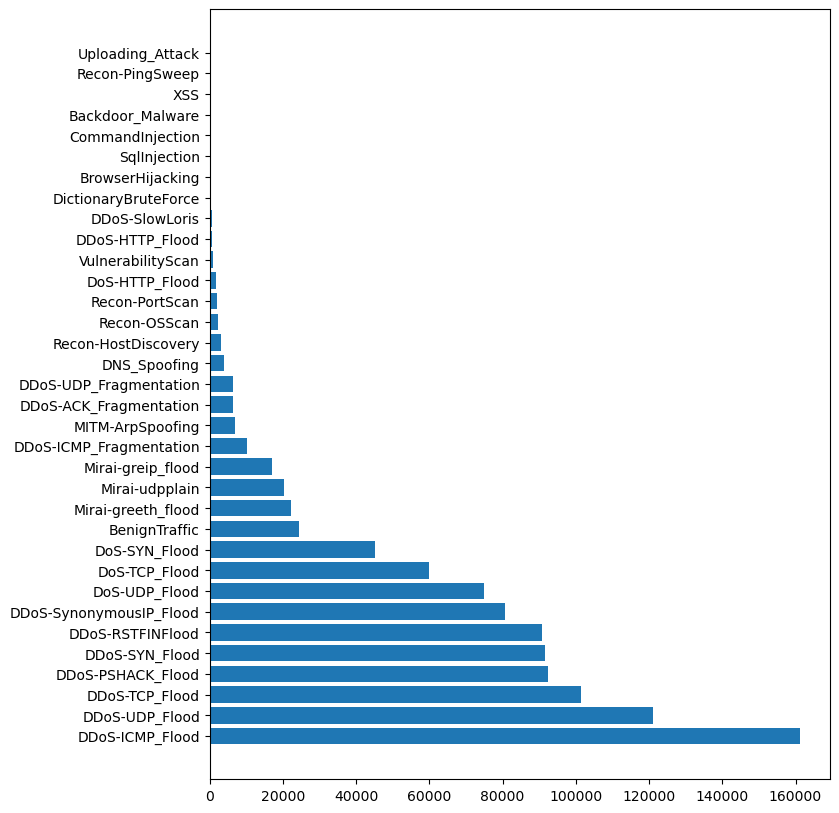

In [5]:
plt.figure(figsize=(8, 10))
plt.barh(labels, counts)
plt.show()

In [8]:
# standard libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.simplefilter('ignore')
import gc

# visualisation
import matplotlib.pyplot as plt
%matplotlib inline

# sklearn
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.preprocessing import *
from sklearn.decomposition import *
from sklearn.feature_selection import *
from sklearn.pipeline import *
from sklearn.random_projection import *
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression

# load data
CSV = 'dataset/CICIoT2023/IoT_Intrusion.csv'
df = pd.read_csv(CSV)


# drop NULLs & reset index
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

# encoding the target / label
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])


# view
df.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1,0,1,...,0.000000,54.00,83343831.92,9.5,10.392305,0.000000,0.000000,0.00,141.55,9
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0,0,0,...,2.822973,57.04,82926067.47,9.5,10.464666,4.010353,160.987842,0.05,141.55,20
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0,0,0,...,0.000000,42.00,83127993.93,9.5,9.165151,0.000000,0.000000,0.00,141.55,6
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0,0,0,...,0.000000,50.00,83015696.38,9.5,10.000000,0.000000,0.000000,0.00,141.55,21
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0,1,0,...,23.113111,57.88,82972999.18,9.5,11.346876,32.716243,3016.808286,0.19,141.55,19


In [13]:
# create temp dataframe with top n rows for each label
'''
this is done incase the pipeline gets choked due to
large number of datapoints

'''
n = 100
temp = df.groupby('label').head(n)
temp.reset_index(drop=True,inplace=True)
temp.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1,0,1,...,0.000000,54.00,83343831.92,9.5,10.392305,0.000000,0.000000,0.00,141.55,9
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0,0,0,...,2.822973,57.04,82926067.47,9.5,10.464666,4.010353,160.987842,0.05,141.55,20
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0,0,0,...,0.000000,42.00,83127993.93,9.5,9.165151,0.000000,0.000000,0.00,141.55,6
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0,0,0,...,0.000000,50.00,83015696.38,9.5,10.000000,0.000000,0.000000,0.00,141.55,21
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0,1,0,...,23.113111,57.88,82972999.18,9.5,11.346876,32.716243,3016.808286,0.19,141.55,19


In [10]:
# feature engineering & split
#x, y = df.iloc[:,:-1], df[['label']]
x, y = temp.iloc[:,:-1], temp[['label']]


TEST_SPLIT = 0.2
x_train, x_val, y_train, y_val = train_test_split(x, y,
                                                  test_size=TEST_SPLIT, 
                                                  shuffle=True, stratify=y)

# view
print(f"Training size: {x_train.shape[0]}\nValidation size: {x_val.shape[0]}")

Training size: 1331
Validation size: 333


In [11]:
# simple pipeline
pipe = Pipeline(
    [
        ("scaling", StandardScaler()),
        ("reduce_dim", "passthrough"),    # the reduce_dim stage is populated by the param_grid
        ("classify", GaussianProcessClassifier(random_state= np.random.randint(1,10)
                                               , max_iter_predict=50
                                               , multi_class='one_vs_one')),
    ])


# number of features option list
N_FEATURES_OPTIONS = [10, 20, 30]
log_reg_estimator = LogisticRegression()

# parameter grid
param_grid = [
    {
        # Sparse PCA
        "reduce_dim": [SparsePCA(max_iter=200)],
        "reduce_dim__n_components": N_FEATURES_OPTIONS,
    },
    #{
    #    # NMF
    #    "reduce_dim": [NMF(max_iter=200)],
    #    "reduce_dim__n_components": N_FEATURES_OPTIONS,
    #},    
    {
        # Sparse Random Projection
        "reduce_dim": [SparseRandomProjection()],
        "reduce_dim__n_components": N_FEATURES_OPTIONS,
    },    
    {
        # Gaussian Random Projection
        "reduce_dim": [GaussianRandomProjection()],
        "reduce_dim__n_components": N_FEATURES_OPTIONS,
    },    
    {
        # mutual_info_classif with SelectKBest
        "reduce_dim": [SelectKBest(mutual_info_classif)],
        "reduce_dim__k": N_FEATURES_OPTIONS,
    },
    {
        # logistic regression with RFE
        "reduce_dim": [RFE(log_reg_estimator,step=5)],
        "reduce_dim__n_features_to_select": N_FEATURES_OPTIONS,
    },    
    
]

# dimensionality reduction labels
reducer_labels = [
                  "SPCA", # Sparse Principal Components Analysis  
                 # "NMF",  # Non-Negative Matrix Factorization
                   "SRP",  # Sparse Random Projection
                   "GRP",  # Gaussian Random Projection
                   "KB",   # KBest(mutual_info_classif)
                   "RFE"   # RFE(LogisticRegression) 
                 ]

In [12]:
# fit the pipeline using GridSearchCV
grid = GridSearchCV(pipe
                    ,n_jobs=1
                    ,param_grid=param_grid
                    ,cv=3)

grid.fit(x_train, y_train)


# get the mean score
mean_scores = np.array(grid.cv_results_["mean_test_score"])


# scores are in the order of param_grid iteration
mean_scores = mean_scores.reshape(len(reducer_labels),len(N_FEATURES_OPTIONS))


# create a dataframe to ease plotting
mean_scores = pd.DataFrame(mean_scores.T, index=N_FEATURES_OPTIONS, columns=reducer_labels)


# visualise the score per feature options per reducer
fig = go.Figure()

feature_nums = mean_scores.index.to_list()
palette = ['#dceed1', '#aac0aa', '#736372', '#a18276', '#7a918d']


for r,c in  zip (reducer_labels, palette):
    # add the bar trace 
    fig.add_trace(go.Bar(x=feature_nums,
                         y=mean_scores[r].to_list(),
                         name=r,
                         hovertemplate= '<br>'.join(['acc: %{y}', 'n_features: %{x}', 'technique:'+r, '<extra></extra>']),
                         marker_color=c))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group'
                  ,title_text='Comparing feature reduction techniques'
                  ,xaxis_title="Reduced number of features"
                  ,yaxis_title="Digit classification accuracy")

fig.update_yaxes(range=[0.1, 0.6])
fig.show()

NameError: name 'go' is not defined

In [ ]:
# number of features option list
N_FEATURES = 30
reduction_dim = SelectKBest(mutual_info_classif, k=N_FEATURES)

# simple pipeline
new_pipe = Pipeline(
    [
        ("scaling", StandardScaler()),
        
        ("reduce_dim", SelectKBest(mutual_info_classif
                                   , k=N_FEATURES)),   
        
        ("classify", GaussianProcessClassifier(random_state= np.random.randint(1,10)
                                               , max_iter_predict=50
                                               , multi_class='one_vs_one')),
    ])

In [ ]:
# fit the new pipeline with mini dataset for saving memory
new_pipe.fit(x_train, y_train)

# make the prediction
y_pred = new_pipe.predict(x_val)

# get the accuracy score
acc = '{:.1%}'.format(accuracy_score(y_val, y_pred))

# print
print(f"Accuracy score on mini dataset with Gaussian Process Classifier & SelectKBest Feature Reduction: {acc}")

In [14]:
df = pd.read_csv("dataset/CICIoT2023/IoT_Intrusion.csv")

all_labels = pd.unique(df["label"])
all_labels


array(['DDoS-RSTFINFlood', 'DoS-TCP_Flood', 'DDoS-ICMP_Flood',
       'DoS-UDP_Flood', 'DoS-SYN_Flood', 'Mirai-greeth_flood',
       'DDoS-SynonymousIP_Flood', 'Mirai-udpplain', 'DDoS-SYN_Flood',
       'DDoS-PSHACK_Flood', 'DDoS-TCP_Flood', 'DDoS-UDP_Flood',
       'BenignTraffic', 'MITM-ArpSpoofing', 'DDoS-ACK_Fragmentation',
       'Mirai-greip_flood', 'DoS-HTTP_Flood', 'DDoS-ICMP_Fragmentation',
       'Recon-PortScan', 'DNS_Spoofing', 'DDoS-UDP_Fragmentation',
       'Recon-OSScan', 'XSS', 'DDoS-HTTP_Flood', 'Recon-HostDiscovery',
       'CommandInjection', 'VulnerabilityScan', 'DDoS-SlowLoris',
       'Backdoor_Malware', 'BrowserHijacking', 'DictionaryBruteForce',
       'SqlInjection', 'Recon-PingSweep', 'Uploading_Attack'],
      dtype=object)

In [15]:
def no_underscore_labels_eraser(dataframe):
    return dataframe[(dataframe["label"].str.find("-") != -1) &
                (dataframe["label"].str.find("-") != -1) |
                (dataframe["label"] == "BenignTraffic")]

In [16]:
def label_transformer(label: str):
    if label == "BenignTraffic":
        return label

    character = "-" if "-" in label else "_"

    return label.split(character)[0]

In [17]:
def label_selection(dataframe):
    no_underscore_df = no_underscore_labels_eraser(dataframe)
    label_transformer_vec = np.vectorize(label_transformer)
    return label_transformer_vec(no_underscore_df["label"])

In [18]:
tmp_counter = 0
no_underscore_columns = []

for info in all_labels:

  if info.find("BenignTraffic") != -1:
    continue

  if info.find("-") == -1 and info.find("_") == -1:
    tmp_counter += 1
    no_underscore_columns.append(info)

print(no_underscore_columns)
tmp_counter/all_labels.shape[0]

['XSS', 'CommandInjection', 'VulnerabilityScan', 'BrowserHijacking', 'DictionaryBruteForce', 'SqlInjection']


0.17647058823529413

In [19]:
selected_lables = label_selection(df)
pd.unique(selected_lables)

array(['DDoS', 'DoS', 'Mirai', 'BenignTraffic', 'MITM', 'Recon'],
      dtype='<U13')

In [21]:
df_with_selected_labels = no_underscore_labels_eraser(df)
df_with_selected_labels.loc[:,"final_label"] = selected_lables
df_with_selected_labels.loc[:15, ["label", "final_label"]]


,label,final_label
0,DDoS-RSTFINFlood,DDoS
1,DoS-TCP_Flood,DoS
2,DDoS-ICMP_Flood,DDoS
3,DoS-UDP_Flood,DoS
4,DoS-SYN_Flood,DoS
5,Mirai-greeth_flood,Mirai
6,DDoS-SynonymousIP_Flood,DDoS
7,Mirai-udpplain,Mirai
8,DoS-UDP_Flood,DoS
9,DDoS-SYN_Flood,DDoS


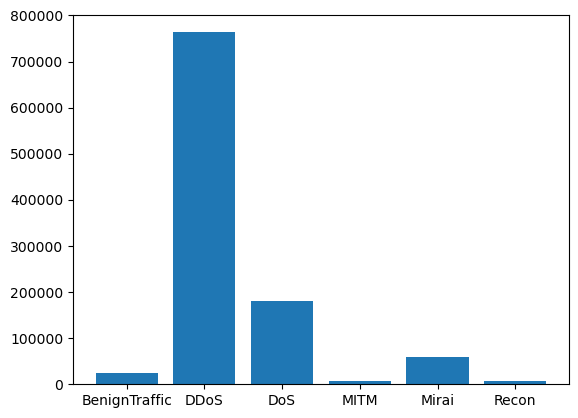

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1,0,1,...,0.000000,54.00,83343831.92,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0,0,0,...,2.822973,57.04,82926067.47,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0,0,0,...,0.000000,42.00,83127993.93,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0,0,0,...,0.000000,50.00,83015696.38,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0,1,0,...,23.113111,57.88,82972999.18,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood


In [24]:
final_label_columns, counts_per_column = np.unique(df_with_selected_labels["final_label"], return_counts=True)

plt.bar(final_label_columns, counts_per_column)
plt.show()
df_with_selected_labels.to_csv("dataset/CICIoT2023/CICIoT2023_selected_labels.csv", index=False)
df.head()

In [25]:
df_with_selected_labels.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label,final_label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1,0,1,...,54.00,83343831.92,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood,DDoS
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0,0,0,...,57.04,82926067.47,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood,DoS
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0,0,0,...,42.00,83127993.93,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood,DDoS
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0,0,0,...,50.00,83015696.38,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood,DoS
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0,1,0,...,57.88,82972999.18,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood,DoS


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/Users/yanjieli/program/IDS_AGENT/dataset/CICIoT2023/CICIoT2023_selected_labels.csv")

# 获取所有的标签
labels = df['label'].unique()

# 初始化训练集和测试集
train_df = pd.DataFrame(columns=df.columns)
test_df = pd.DataFrame(columns=df.columns)

# 处理每个标签
for label in labels:
    label_df = df[df['label'] == label]
    # if len(label_df) < 100:
    #     test_df = pd.concat([test_df, label_df])
    #     print(f"Label '{label}' has less than 100 samples, all samples are added to the test set.")
    # else:
    label_train_df, label_test_df = train_test_split(label_df, test_size=0.4, random_state=42)
    train_df = pd.concat([train_df, label_train_df])
    test_df = pd.concat([test_df, label_test_df])

# 重置索引
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

# 保存训练集和测试集到CSV文件
train_df.to_csv('dataset/CICIoT2023/train_set.csv', index=False)
test_df.to_csv('dataset/CICIoT2023/test_set.csv', index=False)

print("Training and testing datasets have been created and saved to 'train_set.csv' and 'test_set.csv'.")

/var/folders/p8/grgvl0516yb122t7th7yp_v00000gn/T/ipykernel_23087/3413205850.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  train_df = pd.concat([train_df, label_train_df])
/var/folders/p8/grgvl0516yb122t7th7yp_v00000gn/T/ipykernel_23087/3413205850.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  test_df = pd.concat([test_df, label_test_df])


KeyboardInterrupt: 

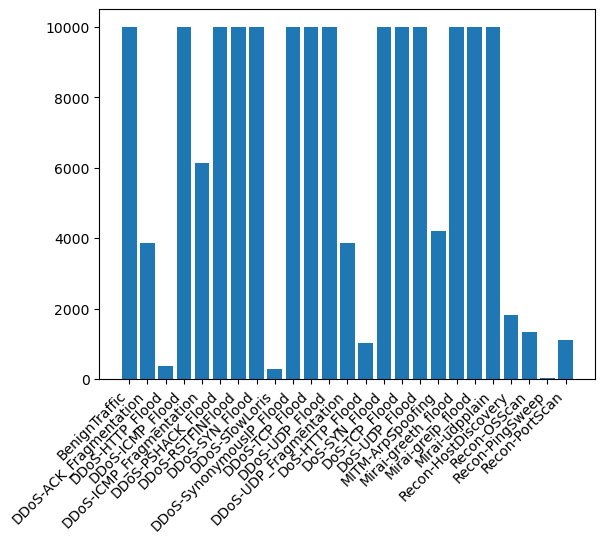

In [9]:
import numpy as np
n = 10000
train_df = pd.read_csv('dataset/CICIoT2023/train_set.csv')
temp = train_df.groupby('label').head(n)
temp.reset_index(drop=True,inplace=True)
temp.head()
temp.to_csv('dataset/CICIoT2023/train_set_small.csv', index=False)
final_label_columns, counts_per_column = np.unique(temp["label"], return_counts=True)

plt.bar(final_label_columns, counts_per_column)
plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees and align them to the right

plt.show()



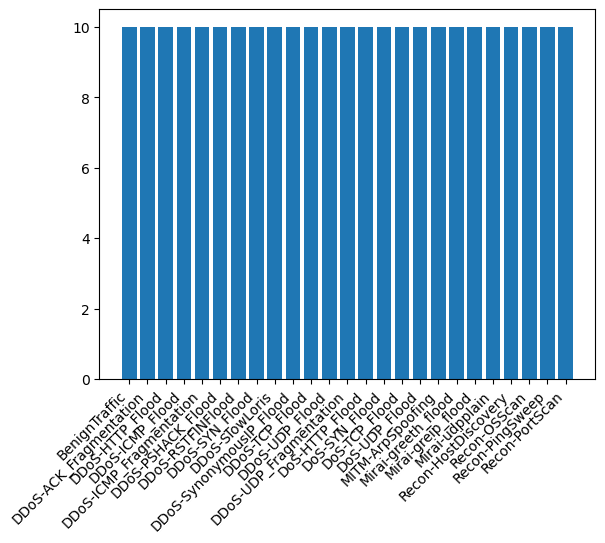

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
n = 10
test_df = pd.read_csv('dataset/CICIoT2023/test_set.csv')

temp = test_df.groupby('label').head(n)
temp.reset_index(drop=True,inplace=True)
temp.head()
temp.to_csv('dataset/CICIoT2023/test_set_small.csv', index=False)
final_label_columns, counts_per_column = np.unique(temp["label"], return_counts=True)

plt.bar(final_label_columns, counts_per_column)
plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees and align them to the right

plt.show()


index: 0, Label: BenignTraffic, Count: 9791
index: 1, Label: DDoS-ACK_Fragmentation, Count: 2573
index: 2, Label: DDoS-HTTP_Flood, Count: 251
index: 3, Label: DDoS-ICMP_Flood, Count: 64513
index: 4, Label: DDoS-ICMP_Fragmentation, Count: 4090
index: 5, Label: DDoS-PSHACK_Flood, Count: 36958
index: 6, Label: DDoS-RSTFINFlood, Count: 36330
index: 7, Label: DDoS-SYN_Flood, Count: 36658
index: 8, Label: DDoS-SlowLoris, Count: 198
index: 9, Label: DDoS-SynonymousIP_Flood, Count: 32272
index: 10, Label: DDoS-TCP_Flood, Count: 40518
index: 11, Label: DDoS-UDP_Flood, Count: 48482
index: 12, Label: DDoS-UDP_Fragmentation, Count: 2573
index: 13, Label: DoS-HTTP_Flood, Count: 672
index: 14, Label: DoS-SYN_Flood, Count: 18083
index: 15, Label: DoS-TCP_Flood, Count: 23923
index: 16, Label: DoS-UDP_Flood, Count: 29915
index: 17, Label: MITM-ArpSpoofing, Count: 2808
index: 18, Label: Mirai-greeth_flood, Count: 8846
index: 19, Label: Mirai-greip_flood, Count: 6781
index: 20, Label: Mirai-udpplain, Cou

/var/folders/p8/grgvl0516yb122t7th7yp_v00000gn/T/ipykernel_96864/61023387.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = grouped.apply(select_samples).reset_index(drop=True)


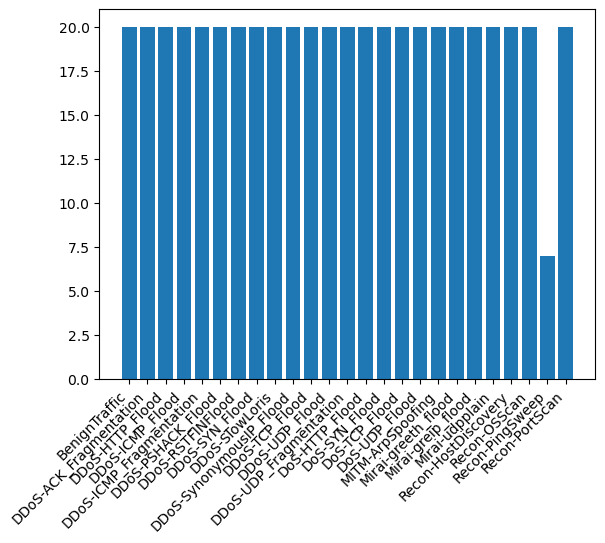

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
def select_samples(group):
    # Select rows 100-199 (Python indexing starts at 0, so 100:200 selects rows 100 to 199)
    return group.iloc[10:30]

test_df = pd.read_csv('dataset/CICIoT2023/test_set.csv')
final_label_columns, counts_per_column = np.unique(test_df["label"], return_counts=True)

# 输出每个label的数量
for index, value in enumerate(zip(final_label_columns, counts_per_column)):
    print(f"index: {index}, Label: {value[0]}, Count: {value[1]}")
    
grouped = test_df.groupby('label')
result = grouped.apply(select_samples).reset_index(drop=True)
result.to_csv('dataset/CICIoT2023/validation_set_small.csv', index=False)
final_label_columns, counts_per_column = np.unique(result["label"], return_counts=True)

# 计算每个label的数量
final_label_columns, counts_per_column = np.unique(result["label"], return_counts=True)

# 输出每个label的数量
for index, value in enumerate(zip(final_label_columns, counts_per_column)):
    print(f"index: {index}, Label: {value[0]}, Count: {value[1]}")


plt.bar(final_label_columns, counts_per_column)
plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees and align them to the right

plt.show()


In [28]:
# Define the features and target
train_df = pd.read_csv("/Users/yanjieli/program/IDS_AGENT/dataset/CICIoT2023/train_set.csv")
train_df.head()
X = train_df.drop(columns=['label',"final_label"])  # Features
y = train_df['label']  # Target
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import joblib
from sklearn.preprocessing import StandardScaler

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

k = 20  # Choose the number of top features to select
kbest = SelectKBest(score_func=f_classif, k=k)
X_new = kbest.fit_transform(X, y_encoded)
scaler = StandardScaler()
print(scaler.fit(X_new))

joblib.dump(label_encoder, 'models_CICIoT/label_encoder.joblib')
joblib.dump(kbest, 'models_CICIoT/kbest_selector.joblib')
joblib.dump(scaler, 'models_CICIoT/scaler.joblib')

/Users/yanjieli/opt/anaconda3/envs/langchain/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [12 13 22 23 24 25] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/yanjieli/opt/anaconda3/envs/langchain/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


StandardScaler()


['models_CICIoT/scaler.joblib']

# Train models

In [29]:
# Transform new data
# new_data = pd.read_csv('new_data.csv')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import joblib
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
train_df = pd.read_csv('dataset/CICIoT2023/train_set.csv')

X = train_df.drop(columns=['label',"final_label"])  # Features
y = train_df['label']  # Target

# Transform the labels
y_train = label_encoder.transform(y)

# Transform the features
x_train = kbest.transform(X)
x_train = scaler.transform(x_train)

# List of models to train
models = [
    ('Random Forest', RandomForestClassifier()),
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    
    ("MLP", MLPClassifier(random_state=1, max_iter=300)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Support Vector Classifier', SVC()),
]

# Train and evaluate models
accuracies = []
weighted_f1_scores = []

for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)
    
    accuracy = accuracy_score(y_train, y_pred)
    accuracies.append(accuracy)

    
    # Save the model
    joblib.dump(model, f'models_CICIoT/{name}.joblib')
    print(name)
    print("accuracy:", accuracy)
     # Print the confusion matrix
    cm = confusion_matrix(y_train, y_pred)
    print(f'Confusion Matrix for {name}:\n{cm}\n')
    report = classification_report(y_train, y_pred, target_names=y.unique())
    print(report)

    


Random Forest
accuracy: 0.8745908660853555
Confusion Matrix for Random Forest:
[[14533     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0   150     0     0     0     1     1     0
      0]
 [    0  3858     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0   375     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0 96768     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0  6133     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0 55436     0     0     0     0     0     0
      0     0     0     1     0     0     0     0     0     0 

/Users/yanjieli/opt/anaconda3/envs/langchain/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yanjieli/opt/anaconda3/envs/langchain/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yanjieli/opt/anaconda3/envs/langchain/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

                         precision    recall  f1-score   support

       DDoS-RSTFINFlood       0.66      0.95      0.78     14685
          DoS-TCP_Flood       0.97      0.97      0.97      3858
        DDoS-ICMP_Flood       0.34      0.11      0.17       375
          DoS-UDP_Flood       1.00      1.00      1.00     96768
          DoS-SYN_Flood       1.00      0.97      0.99      6133
     Mirai-greeth_flood       1.00      1.00      1.00     55437
DDoS-SynonymousIP_Flood       1.00      1.00      1.00     54493
         Mirai-udpplain       0.66      0.96      0.78     54986
         DDoS-SYN_Flood       0.43      0.03      0.06       295
      DDoS-PSHACK_Flood       0.77      0.70      0.74     48408
         DDoS-TCP_Flood       0.64      1.00      0.78     60775
         DDoS-UDP_Flood       0.70      0.97      0.81     72723
          BenignTraffic       0.94      0.98      0.96      3858
       MITM-ArpSpoofing       0.78      0.53      0.63      1008
 DDoS-ACK_Fragmentation 

/Users/yanjieli/opt/anaconda3/envs/langchain/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yanjieli/opt/anaconda3/envs/langchain/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yanjieli/opt/anaconda3/envs/langchain/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

                         precision    recall  f1-score   support

       DDoS-RSTFINFlood       0.77      0.96      0.86     14685
          DoS-TCP_Flood       0.97      0.99      0.98      3858
        DDoS-ICMP_Flood       0.63      0.69      0.66       375
          DoS-UDP_Flood       1.00      1.00      1.00     96768
          DoS-SYN_Flood       0.98      0.99      0.98      6133
     Mirai-greeth_flood       1.00      1.00      1.00     55437
DDoS-SynonymousIP_Flood       1.00      1.00      1.00     54493
         Mirai-udpplain       0.75      0.20      0.32     54986
         DDoS-SYN_Flood       0.63      0.56      0.59       295
      DDoS-PSHACK_Flood       0.94      0.62      0.75     48408
         DDoS-TCP_Flood       0.77      0.13      0.22     60775
         DDoS-UDP_Flood       0.76      0.13      0.22     72723
          BenignTraffic       0.99      0.99      0.99      3858
       MITM-ArpSpoofing       0.86      0.82      0.84      1008
 DDoS-ACK_Fragmentation 

/Users/yanjieli/opt/anaconda3/envs/langchain/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                         precision    recall  f1-score   support

       DDoS-RSTFINFlood       0.70      0.97      0.82     14685
          DoS-TCP_Flood       0.99      0.99      0.99      3858
        DDoS-ICMP_Flood       0.60      0.25      0.36       375
          DoS-UDP_Flood       1.00      1.00      1.00     96768
          DoS-SYN_Flood       1.00      0.98      0.99      6133
     Mirai-greeth_flood       1.00      1.00      1.00     55437
DDoS-SynonymousIP_Flood       1.00      1.00      1.00     54493
         Mirai-udpplain       0.66      0.96      0.79     54986
         DDoS-SYN_Flood       0.39      0.21      0.28       295
      DDoS-PSHACK_Flood       0.77      0.72      0.74     48408
         DDoS-TCP_Flood       0.64      0.99      0.78     60775
         DDoS-UDP_Flood       0.69      0.98      0.81     72723
          BenignTraffic       0.99      0.98      0.99      3858
       MITM-ArpSpoofing       0.75      0.79      0.77      1008
 DDoS-ACK_Fragmentation 

/Users/yanjieli/opt/anaconda3/envs/langchain/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yanjieli/opt/anaconda3/envs/langchain/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


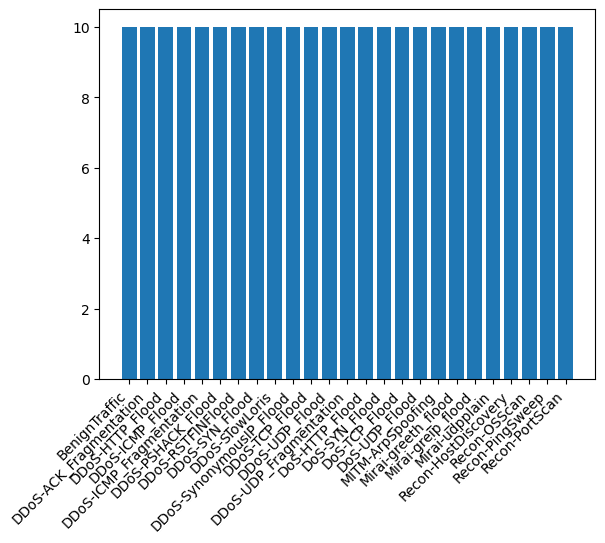

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import joblib
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("dataset/CICIoT2023/test_set_small.csv")
final_label_columns, counts_per_column = np.unique(df["label"], return_counts=True)

plt.bar(final_label_columns, counts_per_column)
plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees and align them to the right

plt.show()


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import joblib
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import  classification_report
from collections import Counter
import matplotlib.pyplot as plt
import json
# Load the dataset
df = pd.read_csv("dataset/CICIoT2023/test_set_small.csv")
final_label_columns, counts_per_column = np.unique(df["label"], return_counts=True)
# Extract true labels and drop them from the dataset
y_test = df['label'].values
X = df.drop(columns=['label', "final_label"])

# Transform the features
kbest = joblib.load('models_CICIoT/kbest_selector.joblib')
x_test = kbest.transform(X)
scaler = joblib.load('models_CICIoT/scaler.joblib')
x_test = scaler.transform(x_test)

# List of models
models = [
    ('Random Forest', RandomForestClassifier()),
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    
    ("MLP", MLPClassifier(random_state=1, max_iter=300)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Support Vector Classifier', SVC()),
]

# Initialize a list to collect results and a list for storing all model predictions
results = []
results_dict = {}
all_predictions = []

# Loop through the models, load each one, and evaluate it
for model_name, _ in models:
    # Load the model
    print(model_name)
    model = joblib.load(f"models_CICIoT/{model_name}.joblib")

    # Predict the labels
    y_pred = model.predict(x_test)
    label_encoder = joblib.load('models_CICIoT/label_encoder.joblib')
        
    y_pred = label_encoder.inverse_transform(y_pred)
    labels = label_encoder.classes_

    # Store the predictions for voting
    all_predictions.append(y_pred)

    # Get the classification report as a dictionary
    report = classification_report(y_test, y_pred, target_names=labels, output_dict=True)
    print(report)
    
    # Add the results for each class to the list, rounding to 2 decimal places
    for label in labels:
        precision = round(report[label]['precision'], 2)
        recall = round(report[label]['recall'], 2)
        f1 = round(report[label]['f1-score'], 2)
        results.append([label, model_name, precision, recall, f1])

    # Add macro avg and weighted avg to the list, rounding to 2 decimal places
    results.append(["Macro Avg", model_name, round(report['macro avg']['precision'], 2), round(report['macro avg']['recall'], 2), round(report['macro avg']['f1-score'], 2)])
    results.append(["Weighted Avg", model_name, round(report['weighted avg']['precision'], 2), round(report['weighted avg']['recall'], 2), round(report['weighted avg']['f1-score'], 2)])
    
    results_dict[model_name] = {}
    for label in labels:
        results_dict[model_name][label] = {
        "precision": round(report[label]['precision'], 2),
        "recall": round(report[label]['recall'], 2),
        "f1-score": round(report[label]['f1-score'], 2)
    }

# Write the results to a JSON file
with open("results/classifier_results_CICIoT.json", "w") as f:
    json.dump(results_dict, f, indent=4)



Random Forest


/Users/yanjieli/opt/anaconda3/envs/langchain/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yanjieli/opt/anaconda3/envs/langchain/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yanjieli/opt/anaconda3/envs/langchain/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

{'BenignTraffic': {'precision': 0.225, 'recall': 0.9, 'f1-score': 0.36, 'support': 10.0}, 'DDoS-ACK_Fragmentation': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 10.0}, 'DDoS-HTTP_Flood': {'precision': 0.5833333333333334, 'recall': 0.7, 'f1-score': 0.6363636363636364, 'support': 10.0}, 'DDoS-ICMP_Flood': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 10.0}, 'DDoS-ICMP_Fragmentation': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 10.0}, 'DDoS-PSHACK_Flood': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 10.0}, 'DDoS-RSTFINFlood': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 10.0}, 'DDoS-SYN_Flood': {'precision': 0.6923076923076923, 'recall': 0.9, 'f1-score': 0.782608695652174, 'support': 10.0}, 'DDoS-SlowLoris': {'precision': 1.0, 'recall': 0.7, 'f1-score': 0.8235294117647058, 'support': 10.0}, 'DDoS-SynonymousIP_Flood': {'precision': 0.875, 'recall': 0.7, 'f1-score': 0.7777777777777778, 'support': 10.0}, 'DD

/Users/yanjieli/opt/anaconda3/envs/langchain/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yanjieli/opt/anaconda3/envs/langchain/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yanjieli/opt/anaconda3/envs/langchain/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

{'BenignTraffic': {'precision': 0.18518518518518517, 'recall': 1.0, 'f1-score': 0.3125, 'support': 10.0}, 'DDoS-ACK_Fragmentation': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 10.0}, 'DDoS-HTTP_Flood': {'precision': 0.3333333333333333, 'recall': 0.1, 'f1-score': 0.15384615384615385, 'support': 10.0}, 'DDoS-ICMP_Flood': {'precision': 0.9090909090909091, 'recall': 1.0, 'f1-score': 0.9523809523809523, 'support': 10.0}, 'DDoS-ICMP_Fragmentation': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 10.0}, 'DDoS-PSHACK_Flood': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 10.0}, 'DDoS-RSTFINFlood': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 10.0}, 'DDoS-SYN_Flood': {'precision': 0.5, 'recall': 0.9, 'f1-score': 0.6428571428571429, 'support': 10.0}, 'DDoS-SlowLoris': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 10.0}, 'DDoS-SynonymousIP_Flood': {'precision': 0.6153846153846154, 'recall': 0.8, 'f1-score': 0.69565217

/Users/yanjieli/opt/anaconda3/envs/langchain/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yanjieli/opt/anaconda3/envs/langchain/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yanjieli/opt/anaconda3/envs/langchain/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

{'BenignTraffic': {'precision': 0.20930232558139536, 'recall': 0.9, 'f1-score': 0.33962264150943394, 'support': 10.0}, 'DDoS-ACK_Fragmentation': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 10.0}, 'DDoS-HTTP_Flood': {'precision': 0.8, 'recall': 0.4, 'f1-score': 0.5333333333333333, 'support': 10.0}, 'DDoS-ICMP_Flood': {'precision': 0.9090909090909091, 'recall': 1.0, 'f1-score': 0.9523809523809523, 'support': 10.0}, 'DDoS-ICMP_Fragmentation': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 10.0}, 'DDoS-PSHACK_Flood': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 10.0}, 'DDoS-RSTFINFlood': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 10.0}, 'DDoS-SYN_Flood': {'precision': 0.3333333333333333, 'recall': 0.1, 'f1-score': 0.15384615384615385, 'support': 10.0}, 'DDoS-SlowLoris': {'precision': 0.875, 'recall': 0.7, 'f1-score': 0.7777777777777778, 'support': 10.0}, 'DDoS-SynonymousIP_Flood': {'precision': 0.8571428571428571, 'recall

/Users/yanjieli/opt/anaconda3/envs/langchain/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yanjieli/opt/anaconda3/envs/langchain/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yanjieli/opt/anaconda3/envs/langchain/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

voting report:
{'BenignTraffic': {'precision': 0.2, 'recall': 0.9, 'f1-score': 0.32727272727272727, 'support': 10.0}, 'DDoS-ACK_Fragmentation': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 10.0}, 'DDoS-HTTP_Flood': {'precision': 0.6666666666666666, 'recall': 0.6, 'f1-score': 0.631578947368421, 'support': 10.0}, 'DDoS-ICMP_Flood': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 10.0}, 'DDoS-ICMP_Fragmentation': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 10.0}, 'DDoS-PSHACK_Flood': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 10.0}, 'DDoS-RSTFINFlood': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 10.0}, 'DDoS-SYN_Flood': {'precision': 0.6923076923076923, 'recall': 0.9, 'f1-score': 0.782608695652174, 'support': 10.0}, 'DDoS-SlowLoris': {'precision': 0.875, 'recall': 0.7, 'f1-score': 0.7777777777777778, 'support': 10.0}, 'DDoS-SynonymousIP_Flood': {'precision': 0.875, 'recall': 0.7, 'f1-score': 0.7777777777

/Users/yanjieli/opt/anaconda3/envs/langchain/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yanjieli/opt/anaconda3/envs/langchain/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yanjieli/opt/anaconda3/envs/langchain/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

<Figure size 800x600 with 0 Axes>

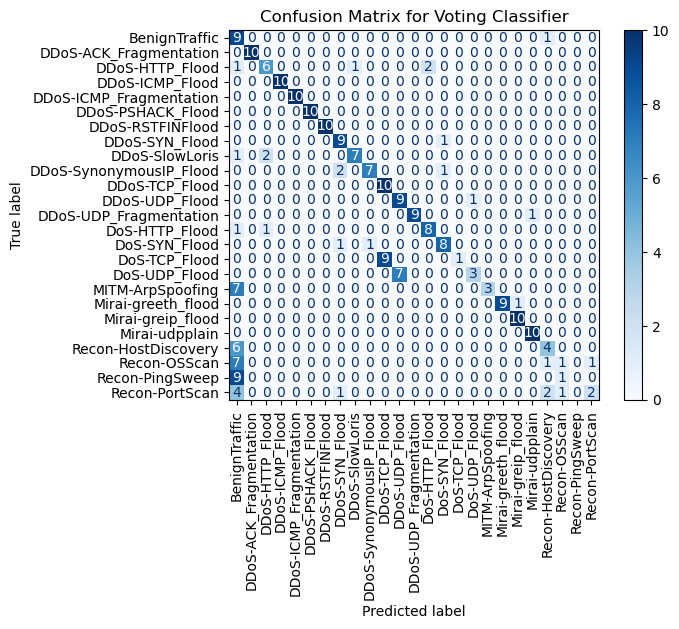

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from collections import Counter
from sklearn.metrics import classification_report
# Perform voting by taking the most common prediction for each sample
voting_pred = []

# Transpose the list of predictions so each sublist contains predictions for a single sample
transposed_predictions = np.array(all_predictions).T

# Perform majority voting for each sample
for predictions in transposed_predictions:
    most_common_label = Counter(predictions).most_common(1)[0][0]
    voting_pred.append(most_common_label)

voting_pred = np.array(voting_pred)  # Convert to numpy array

# Get the classification report for the voting classifier
voting_report = classification_report(y_test, voting_pred, target_names=labels, output_dict=True)
print("voting report:")
print(voting_report)

# Plot the confusion matrix for the voting classifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test, voting_pred, and labels are already defined
cm = confusion_matrix(y_test, voting_pred)
print("the total number ", len(y_test))
# Plot the confusion matrix with x-tick labels tilted at 45 degrees
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)

# Rotate the x-axis labels 45 degrees
plt.xticks(rotation=90)

plt.title("Confusion Matrix for Voting Classifier")
plt.show()



total: 250


<Figure size 800x600 with 0 Axes>

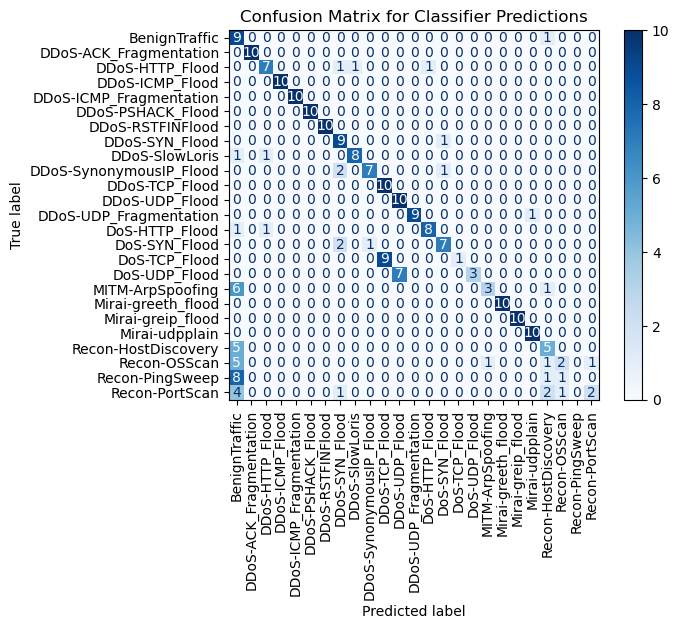

In [13]:
import json
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
labels = [
    "BenignTraffic", "DDoS-ACK_Fragmentation", "DDoS-HTTP_Flood", "DDoS-ICMP_Flood", 
    "DDoS-ICMP_Fragmentation", "DDoS-PSHACK_Flood", "DDoS-RSTFINFlood", 
    "DDoS-SYN_Flood", "DDoS-SlowLoris", "DDoS-SynonymousIP_Flood", "DDoS-TCP_Flood", 
    "DDoS-UDP_Flood", "DDoS-UDP_Fragmentation", "DoS-HTTP_Flood", "DoS-SYN_Flood", 
    "DoS-TCP_Flood", "DoS-UDP_Flood", "MITM-ArpSpoofing", "Mirai-greeth_flood", 
    "Mirai-greip_flood", "Mirai-udppplain", "Recon-HostDiscovery", "Recon-OSScan", 
    "Recon-PingSweep", "Recon-PortScan"
]

# Load the data from a JSON file
with open('/Users/yanjieli/program/IDS_AGENT/results/classification_results_CICIoT_0904.txt', 'r') as f:
    data = json.load(f)

# Extract the predicted labels and true labels
predicted_labels = [entry['predicted_label_top_1'] for entry in data]
true_labels = [entry['true_label'] for entry in data]
print("total:", len(true_labels))
# Compute the confusion matrix
labels = np.unique(true_labels)  # Get all unique labels
cm = confusion_matrix(true_labels, predicted_labels, labels=labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)

# Rotate x-axis labels 45 degrees
plt.xticks(rotation=90)

plt.title("Confusion Matrix for Classifier Predictions")
plt.show()


In [ ]:
# Add the voting classifier results to the list
for label in labels:
    precision = round(voting_report[label]['precision'], 2)
    recall = round(voting_report[label]['recall'], 2)
    f1 = round(voting_report[label]['f1-score'], 2)
    results.append([label, 'Voting Classifier', precision, recall, f1])

# Add macro avg and weighted avg for the voting classifier
results.append(["Macro Avg", 'Voting Classifier', round(voting_report['macro avg']['precision'], 2), round(voting_report['macro avg']['recall'], 2), round(voting_report['macro avg']['f1-score'], 2)])
results.append(["Weighted Avg", 'Voting Classifier', round(voting_report['weighted avg']['precision'], 2), round(voting_report['weighted avg']['recall'], 2), round(voting_report['weighted avg']['f1-score'], 2)])

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results, columns=['Class', 'Model', 'Precision', 'Recall', 'F1-Score'])

# Pivot the table to get a similar format to the provided image
results_pivot = results_df.pivot(index='Class', columns='Model', values=['Precision', 'Recall', 'F1-Score'])

# Save the results to a CSV file
results_pivot.to_csv('model_comparison_results_with_voting_CIC_IoT0906.csv')

# Optionally, display the table
print(results_pivot)




In [39]:
import csv
from collections import defaultdict

# Function to load and parse data from a text file
def load_data_from_txt(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if line:
                # Parse each line assuming the format is consistent
                parts = line.split(', ')
                line_number = int(parts[0].split(': ')[1])
                true_label = parts[1].split(': ')[1]
                predicted_label = parts[2].split(': ')[1]
                
                data.append({
                    "line_number": line_number,
                    "True Label": true_label,
                    "Predicted Label": predicted_label
                })
    return data

# Function to calculate recall, precision, and F1-score for each class
def calculate_metrics(data):
    true_positives = defaultdict(int)
    false_negatives = defaultdict(int)
    false_positives = defaultdict(int)
    class_counts = defaultdict(int)

    for entry in data:
        true_label = entry['True Label']
        predicted_label = entry['Predicted Label']

        if true_label == predicted_label:
            true_positives[true_label] += 1
        else:
            false_negatives[true_label] += 1
            false_positives[predicted_label] += 1

        class_counts[true_label] += 1

    recall = {}
    precision = {}
    fscore = {}
    for label in class_counts.keys():
        tp = true_positives[label]
        fn = false_negatives[label]
        fp = false_positives[label]
        recall[label] = tp / (tp + fn) if (tp + fn) > 0 else 0
        precision[label] = tp / (tp + fp) if (tp + fp) > 0 else 0
        fscore[label] = 2 * precision[label] * recall[label] / (precision[label] + recall[label]) if (precision[label] + recall[label]) > 0 else 0

    return recall, precision, fscore, class_counts

# Function to calculate macro and weighted averages
def calculate_averages(recall, precision, fscore, class_counts):
    total_count = sum(class_counts.values())
    
    macro_avg_recall = sum(recall.values()) / len(recall)
    macro_avg_precision = sum(precision.values()) / len(precision)
    macro_avg_fscore = sum(fscore.values()) / len(fscore)
    
    weighted_avg_recall = sum(recall[label] * class_counts[label] for label in recall) / total_count
    weighted_avg_precision = sum(precision[label] * class_counts[label] for label in precision) / total_count
    weighted_avg_fscore = sum(fscore[label] * class_counts[label] for label in fscore) / total_count
    
    return {
        "macro_avg_recall": macro_avg_recall,
        "macro_avg_precision": macro_avg_precision,
        "macro_avg_fscore": macro_avg_fscore,
        "weighted_avg_recall": weighted_avg_recall,
        "weighted_avg_precision": weighted_avg_precision,
        "weighted_avg_fscore": weighted_avg_fscore
    }

# Function to write results to a CSV file
def write_results_to_csv(file_path, recall, precision, fscore, averages):
    with open(file_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Class", "Recall", "Precision", "F-Score"])
        
        for label in sorted(recall.keys()):
            writer.writerow([label, f"{recall[label]:.2f}", f"{precision[label]:.2f}", f"{fscore[label]:.2f}"])
        
        writer.writerow([])
        writer.writerow(["Metric", "Macro Average", "Weighted Average"])
        writer.writerow(["Recall", f"{averages['macro_avg_recall']:.2f}", f"{averages['weighted_avg_recall']:.2f}"])
        writer.writerow(["Precision", f"{averages['macro_avg_precision']:.2f}", f"{averages['weighted_avg_precision']:.2f}"])
        writer.writerow(["F-Score", f"{averages['macro_avg_fscore']:.2f}", f"{averages['weighted_avg_fscore']:.2f}"])

# Load data from the text file
file_path = '/Users/yanjieli/program/IDS_AGENT/results/classification_results_CICIoT_0820_sixmodels.txt'  # Replace with your actual file path
data = load_data_from_txt(file_path)

# Calculate recall, precision, and F-score for each class
recall_results, precision_results, fscore_results, class_counts = calculate_metrics(data)

# Calculate macro and weighted averages
averages = calculate_averages(recall_results, precision_results, fscore_results, class_counts)

# Write results to a CSV file
output_csv_path = '/Users/yanjieli/program/IDS_AGENT/results/metrics_results_CICIoT_0820.csv'  # Replace with your desired output file path
write_results_to_csv(output_csv_path, recall_results, precision_results, fscore_results, averages)


